<a href="https://colab.research.google.com/github/ashishcas/Python/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,  Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
%matplotlib inline

In [0]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

In [5]:
mnist_data = fashion_mnist.load_data()
x = mnist_data[0][0]
y = mnist_data[0][1]


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
epochs = 10
num_classes = 10
batch_size = 128
batch_size = 128
img_rows, img_cols = 28, 28

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
#print(x_train)

In [0]:
if K.image_data_format() == "channels first":
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 225
x_test /= 225

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

W0719 14:46:45.431235 140592775579520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 14:46:45.446183 140592775579520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [22]:
my_callbacks = [EarlyStopping(monitor="acc", patience=5, mode=max)]

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:511: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


In [23]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.3, callbacks=my_callbacks)
score = model.evaluate(x_test, y_test)
print("Testing Loss:", score[0])
print("Testing Accuracy:", score[1])

W0719 14:51:29.796679 140592775579520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 28140 samples, validate on 12060 samples
Epoch 1/10
28140/28140 [==============================] - 9s 318us/step - loss: 0.8852 - acc: 0.6769 - val_loss: 0.5308 - val_acc: 0.7998
Epoch 2/10
28140/28140 [==============================] - 3s 96us/step - loss: 0.5466 - acc: 0.7977 - val_loss: 0.4497 - val_acc: 0.8385
Epoch 3/10
28140/28140 [==============================] - 3s 97us/step - loss: 0.4718 - acc: 0.8279 - val_loss: 0.3986 - val_acc: 0.8561
Epoch 4/10
28140/28140 [==============================] - 3s 97us/step - loss: 0.4258 - acc: 0.8440 - val_loss: 0.3894 - val_acc: 0.8552
Epoch 5/10
28140/28140 [==============================] - 3s 96us/step - loss: 0.3946 - acc: 0.8553 - val_loss: 0.3617 - val_acc: 0.8691
Epoch 6/10
28140/28140 [==============================] - 3s 97us/step - loss: 0.3734 - acc: 0.8652 - val_loss: 0.3479 - val_acc: 0.8740
Epoch 7/10
28140/28140 [==============================] - 3s 97us/step - loss: 0.3559 - acc: 0.8700 - val_loss: 0.3300 - val_ac

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               102528    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

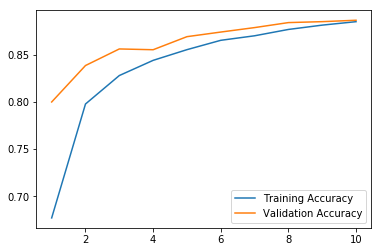

In [25]:
epoch_list = list(range(1, len(hist.history['acc']) + 1))
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(("Training Accuracy", "Validation Accuracy"))
plt.show()